# BASIC LINEAR ALGEBRA FOR MACHINE LEARNING

## Function Approximation using polynomials

We have a complex mathematical function on the segment [1,15]:

$$ y = sin(x/5)·exp(x/10) + 5·exp((-x)/2)$$

It can describe, for example, the dependence of ratings that experts put on a particular wine, depending on the age of this wine. In essence, the problem of machine learning is to bring a complex dependence closer with the help of a function from a certain family. In this task, we will find the approximation of the function by a polynomial, solving a system of linear equations.

In [1]:
import numpy as np
x = np.arange(1.,16.)
def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp((-x)/2)
print(f(x))

[3.25221687 2.31503384 1.87783842 1.74684595 1.7977761  1.94722128
 2.13543898 2.31617016 2.45082365 2.50541641 2.44929128 2.2550105
 1.89904466 1.36300335 0.63522142]


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

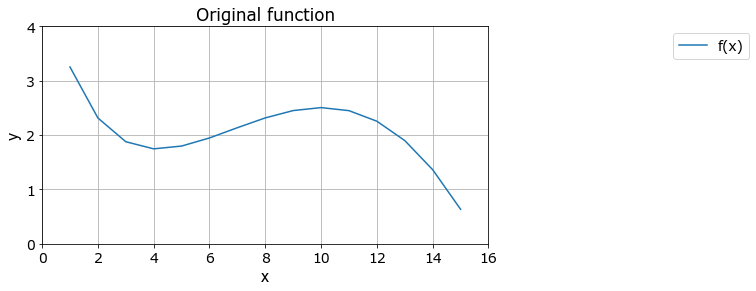

In [3]:
mpl.rc('font', family='Verdana', size= 14)
fig, ax = plt.subplots(figsize=(8,4))

ax.axis([0., 16., 0., 4.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
plt.title('Original function')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

### 1. Approximation by 1st degree polynomial and 2 points

$$Ax + B = y$$

We'll form a system of linear equations (i.e., matrix A of coefficients and the free vector b) of first-degree polynomial, which should coincide with the function at the points x=1 and x=15

In [4]:
x1 = 1.
x2 = 15.
y1 = f(x1)               #Ax1 + B = y1     
y2 = f(x2)               #Ax2 + B = y2 

We can use _scipy.linalg.solve_ as much as _numpy.linalg.solve_ to solve lineal equations. 

In [5]:
# Create a matrix of coefficients

A = np.array([[x1, 1.], [x2, 1]])    # Matrix (left part)
b = np.array([y1, y2])               # Vector (right part)

k1 = np.linalg.solve(A, b)           # coefficients A, B
print(k1)

[-0.18692825  3.43914511]


In [6]:
# Function f1 by 2 points
def f1(x):
    return k1[0]*x + k1[1]      

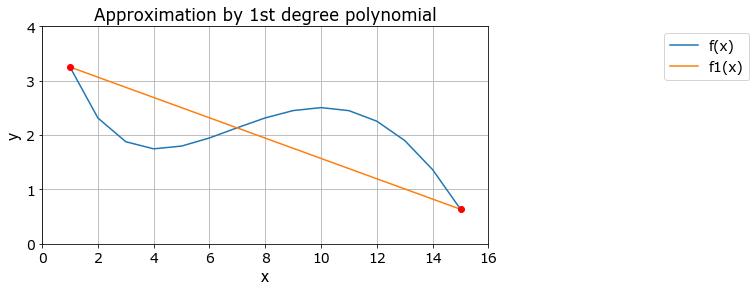

In [7]:
mpl.rc('font', family='Verdana', size= 14)
fig, ax = plt.subplots(figsize=(8,4))

ax.axis([0., 16., 0., 4.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.plot(x, f1(x), label = 'f1(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
plt.plot([x1, x2], [y1, y2], 'ro', label = None)
plt.title('Approximation by 1st degree polynomial')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

### 2.  Approximation by 2nd degree polynomial by 3 points

$$Ax^2 + Bx +C = y$$

In [8]:
x1 = 1.
x2 = 8.
x3 = 15.
y1 = f(x1)               # Ax1^2 + Bx1 + C = y1     
y2 = f(x2)               # Ax2^2 + Bx2 + C = y2 
y3 = f(x3)               # Ax3^2 + Bx3 + C = y3   

In [9]:
A = np.array([[x1**2, x1, 1.], [x2**2, x2, 1.], [x3**2, x3, 1.]])  
b = np.array([y1, y2, y3])      

k2 = np.linalg.solve(A, b)          # coefficientes A, B, C
print(k2)

[-0.00760104 -0.06531159  3.32512949]


In [10]:
# Function f2 by 3 points
def f2(x):
    return k2[0]*(x**2) + k2[1]*x + k2[2]  

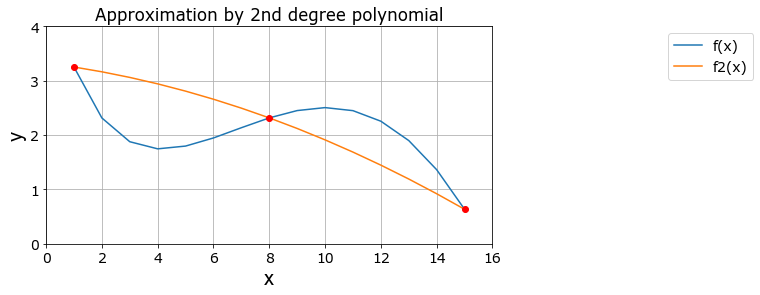

In [11]:
mpl.rc('font', family='Verdana', size= 14)
fig, ax = plt.subplots(figsize=(8,4))

ax.axis([0., 16., 0., 4.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.plot(x, f2(x), label = 'f2(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 20})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 20})
plt.plot([x1, x2, x3], [y1, y2, y3], 'ro', label = None)
plt.title('Approximation by 2nd degree polynomial')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

### 3.  Approximation by 3rd degree polynomial by 4 points

$$Ax^3 + Bx^2 +Cx + D = y$$

In [12]:
x1 = 1.
x2 = 4.
x3 = 10.
x4 = 15.
y1 = f(x1)               # Ax1^3 + Bx1^2 + Cx1 + D = y1     
y2 = f(x2)               # ...
y3 = f(x3)               # ...
y4 = f(x4)               # Ax4^3 + Bx4^2 + Cx4 + D = y4

In [13]:
A = np.array([[x1**3, x1**2, x1, 1.], [x2**3, x2**2, x2, 1.], [x3**3, x3**2, x3, 1.], [x4**3, x4**2, x4, 1.]])  
b = np.array([y1, y2, y3, y4])         
k3 = np.linalg.solve(A, b)          # coefficients A, B, C, D     
print(k3)

[-0.00823565  0.19333685 -1.29552587  4.36264154]


In [14]:
# Function f3 by 4 points
def f3(x):
    return k3[0]*(x**3) + k3[1]*(x**2) + k3[2]*x + k3[3]    

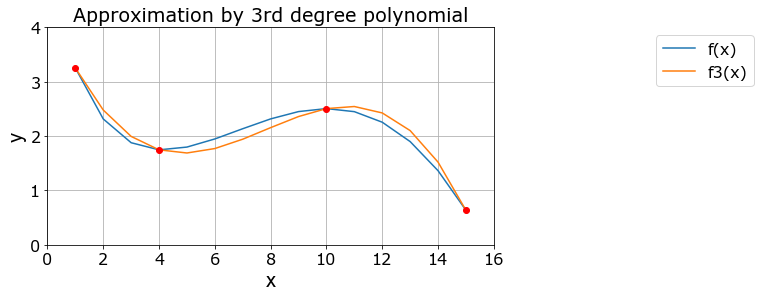

In [15]:
mpl.rc('font', family='Verdana', size= 16)
fig, ax = plt.subplots(figsize=(8,4))

ax.axis([0., 16., 0., 4.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.plot(x, f3(x), label = 'f3(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 20})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 20})
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'ro', label = None)
plt.title('Approximation by 3rd degree polynomial')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

### 4. Results Comparison

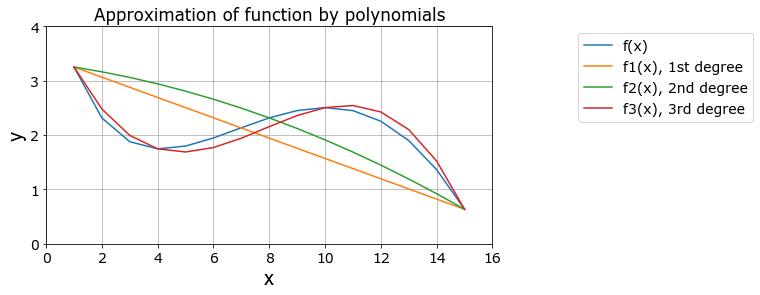

In [16]:
%matplotlib inline
mpl.rc('font', family='Verdana', size= 14)

fig, ax = plt.subplots(figsize=(8,4))

ax.axis([0., 16., 0., 4.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.plot(x, f1(x), label = 'f1(x), 1st degree')
ax.plot(x, f2(x), label = 'f2(x), 2nd degree')
ax.plot(x, f3(x), label = 'f3(x), 3rd degree')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 20})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 20})
plt.title('Approximation of function by polynomials')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()